# PEiAR Laboratorium 11
## Zad.1 (Błądzenie losowe – c.d.)
Zilustruj ścieżkę dla błądzenia losowego po 50 krokach. Ustaw typ ramki wykresu (atrybut pty) na
kwadratowy. Typ samego wykresu (atrybut type) ustaw na ‘o’ tak by widoczna była łamana (ślad
drogi partykuły) a nie same tylko punkty (jak w przypadku wykresu typu ‘p’).
Zakres wartości dla obu osi ustaw na przedział od -10 do +10 natomiast parametrowi cex nadaj
wartość 0.3.


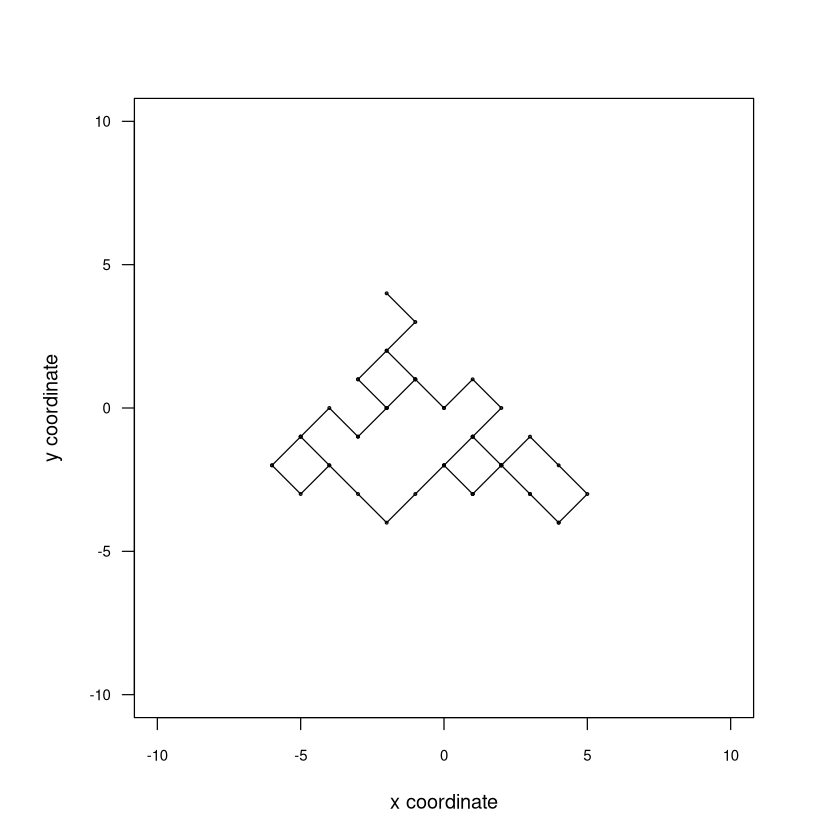

In [22]:
s1 <- sample(c(-1, 1), 50, replace = TRUE)
s2 <- sample(c(-1, 1), 50, replace = TRUE)

x <- c(0, cumsum(s1))
y <- c(0, cumsum(s2))

par(pty = "s")
plot(x, y,
  type = "o",
  xlim = c(-10, 10), ylim = c(-10, 10),
  xlab = "x coordinate", ylab = "y coordinate",
  cex.axis = 0.75,
  cex = 0.3,
  las = 1
)

## Zad.2 (Trójwymiarowy wykres kołowy...)
Wygeneruj ramkę Polska z kolumnami:
Województwo (dolnośląskie, kujawsko-pomorskie, lubelskie, lubuskie, łódzkie, małopolskie,
mazowieckie),
Powierzchnia (19947, 17972, 25122, 13988, 18219, 15183, 35558) // tys. km2
//,
Ludność (2.9, 2.1, 2.1, 1.0, 2.5, 3.4, 5.4) // to w mln //,
LiczbaMiast (91, 52, 48, 43, 46, 62, 89).
Uwaga: używając polecenia summary(...nazwa ramki...) dostajemy zgrabne podsumowanie dla
każdej z kolumn ramki danych.
Do ramki Polska dodaj trzy kolumny: PowierzchniaProcentowo, LudnośćProcentowo oraz
LiczbaMiastProcentowo. Możemy to zrobić w następujący sposób:
`Polska$’PowierzchniaProcentowo’ = percent(round(Powierzchnia / sum(Powierzchnia), 2))`
Co określa ostatni parametr?
Polecenie percent(..) ustawiające format procentowy jest możliwe jedynie po załadowaniu paczki
`scales` (powinna być domyślnie zainstalowana ale nie załadowana).
Analogicznie dołącz pozostałe dwie kolumny.
Chcemy wygenerować trójwymiarowy wykres kołowy. Potrzebujemy paczki `plotrix`. Załącz
ramkę Polska do bieżącej sesji i wygeneruj wykres kołowy:
`pie3D(Powierzchnia, radius = 0.96, theta = 0.9, main = ‘Województwa, powierzchnia’,cex.main
= 1.2, col = rainbow(length(Powierzchnia)), labels = PowierzchniaProcentowo, labelcex = 0.7,
explode = 0.06, mar = c(4, 0, 4, 6))`

I dodaj jeszcze legendę:
`legend(1.2 1.2+, Województwo, cex = 0.7, title = ‘województwo’,
fill=rainbow(length(Powierzchnia)), xpd = T)`
Podobne wykresy wykonaj dla LudnościProcentowo i LiczbyMiastProcentowo.


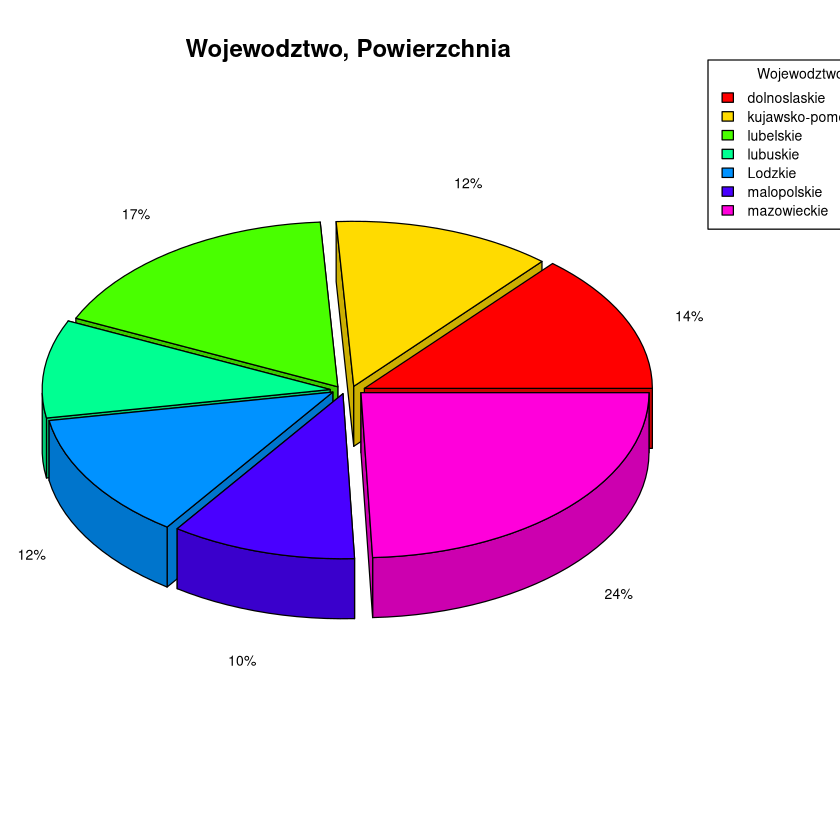

In [45]:
library(scales)
library(plotrix)

polska_ <- data.frame(
  "Wojewodztwo" = c(
    "dolnoslaskie", "kujawsko-pomorskie",
    "lubelskie", "lubuskie", "Lodzkie", "malopolskie",
    "mazowieckie"
  ),
  "Powierzchnia" = c(
    19947, 17972, 25122, 13988,
    18219, 15183, 35558
  ),
  "Ludnosc" = c(2.9, 2.1, 2.1, 1.0, 2.5, 3.4, 5.4),
  "LiczbaMiast" = c(91, 52, 48, 43, 46, 62, 89)
)
polska_$PowierzchniaProcentowo <-
  percent(round(polska_$Powierzchnia / sum(polska_$Powierzchnia), 2))
polska_$LudnoscProcentowo <-
  percent(round(polska_$Ludnosc / sum(polska_$Ludnosc), 2))
polska_$LiczbaMiastProcentowo <-
  percent(round(polska_$LiczbaMiast / sum(polska_$LiczbaMiast), 2))

attach(polska_)
pie3D(
  Powierzchnia,
  radius = 0.96,
  theta = 0.9, main = "Wojewodztwo, Powierzchnia",
  cex.main = 1.2, col = rainbow(length(Powierzchnia)),
  labels = PowierzchniaProcentowo, labelcex = 0.7,
  explode = 0.06, mar = c(4, 0, 4, 6)
)
legend(1.2, 1.2, Wojewodztwo,
  cex = 0.7, title = "Wojewodztwo",
  fill = rainbow(length(Powierzchnia)), xpd = T
)
detach(polska_)

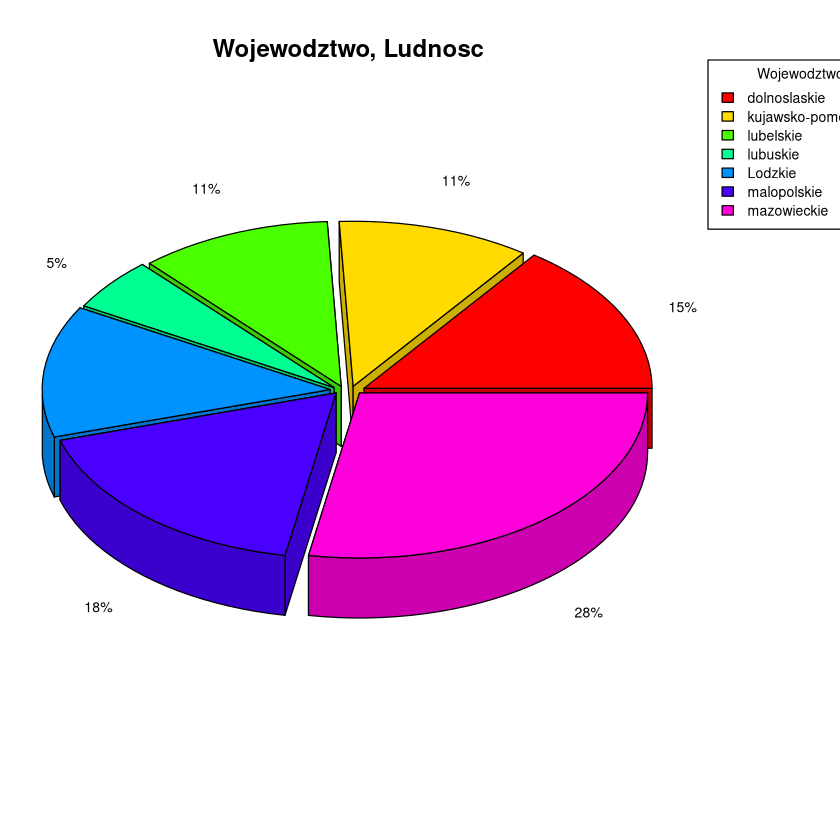

In [49]:
attach(polska_)
pie3D(
  Ludnosc,
  radius = 0.96,
  theta = 0.9, main = "Wojewodztwo, Ludnosc",
  cex.main = 1.2, col = rainbow(length(Powierzchnia)),
  labels = LudnoscProcentowo, labelcex = 0.7,
  explode = 0.06, mar = c(4, 0, 4, 6)
)
legend(1.2, 1.2, Wojewodztwo,
  cex = 0.7, title = "Wojewodztwo",
  fill = rainbow(length(Powierzchnia)), xpd = T
)
detach(polska_)

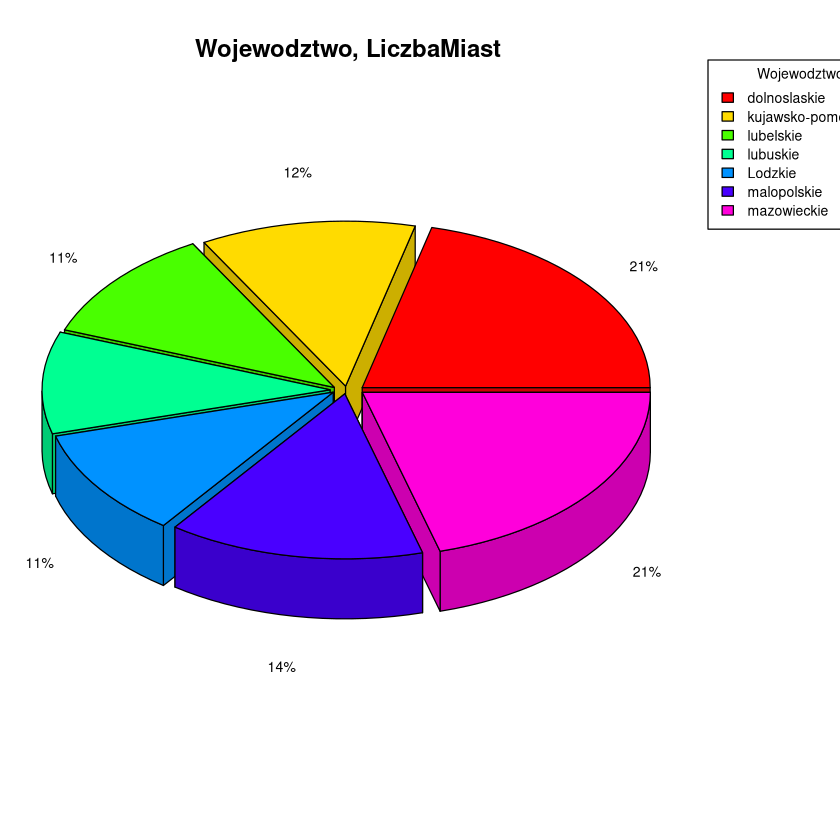

In [48]:
attach(polska_)
pie3D(
  LiczbaMiast,
  radius = 0.96,
  theta = 0.9, main = "Wojewodztwo, LiczbaMiast",
  cex.main = 1.2, col = rainbow(length(Powierzchnia)),
  labels = LiczbaMiastProcentowo, labelcex = 0.7,
  explode = 0.06, mar = c(4, 0, 4, 6)
)
legend(1.2, 1.2, Wojewodztwo,
  cex = 0.7, title = "Wojewodztwo",
  fill = rainbow(length(Powierzchnia)), xpd = T
)
detach(polska_)

## Zad.3 (Testy istotności dla dwóch wariancji)
Pobrano próbki stężenia trującego gazu w powietrzu w miastach dwóch województw i otrzymano
następujące wyniki:
dolnośląskie: 122, 98, 101, 74, 94, 130, 121, 128, 69, 92, 133, 105, 89, 93,
mazowieckie: 99, 102, 84, 77, 84, 138, 112, 72, 67, 93, 100, 124, 120, 88, 75, 95, 109, 80, 114.
Zweryfikuj:
a) hipotezę H0, że poziomy stężeń szkodliwego gazu w obu województwach są jednakowo
zróżnicowane wobec hipotezy alternatywnej H1 orzekającej, że zróżnicowanie poziomu
szkodliwego gazu jest większe w woj. dolnośląskim, przyjmując poziom ufności 0.90


In [50]:
dolno_ <- c(122, 98, 101, 74, 94, 130, 121, 128, 69, 92, 133, 105, 89, 93)
maz_ <- c(99, 102, 84, 77, 84, 138, 112, 72, 67, 93, 100, 124, 120, 88, 75,
 95, 109, 80, 114)
var.test(dolno_, maz_, ratio = 1, alternative = 'greater', conf.level = 0.9)


	F test to compare two variances

data:  dolno_ and maz_
F = 1.1179, num df = 13, denom df = 18, p-value = 0.4045
alternative hypothesis: true ratio of variances is greater than 1
90 percent confidence interval:
 0.5835362       Inf
sample estimates:
ratio of variances 
          1.117946 


b) hipotezę H0, że poziom stężenia szkodliwego gazu jest 4-krotnie większy w woj. dolnośląskim
wobec hipotezy alternatywnej H1 orzekającej, że zróżnicowanie poziomu szkodliwego gazu nie jest
4-krotnie większe w woj. dolnośląskim, na poziomie ufności 0.99.
Jaką statystykę testową wykorzystuje test, którego użyjesz?

In [52]:
var.test(dolno_, maz_, ratio = 4, alternative = 'two.sided', conf.level = 0.99)


	F test to compare two variances

data:  dolno_ and maz_
F = 0.27949, num df = 13, denom df = 18, p-value = 0.02356
alternative hypothesis: true ratio of variances is not equal to 4
99 percent confidence interval:
 0.2947712 4.8455772
sample estimates:
ratio of variances 
          1.117946 


## Zad.4
Zmierzono (przy użyciu specjalnie przygotowanego algorytmu) poziom zadowolenia klientów
dwóch salonów samochodowych z użytkowania aut dwóch luksusowych marek. Otrzymano wyniki
(w ‘Wow’ach na tydzień):
dla I marki: 47, 75, 98, 23, 19, 35, 64, 57, 86, 91, 47, 86, 46, 57, 38, 86, 59, 66, 75
dla II marki: 83, 46, 33, 67, 46, 46, 11, 46, 87, 46, 46, 46, 33, 46, 23, 46.
Zweryfikuj hipotezę, że poziom zadowolenia klientów obu marek samochodów jest jednakowo
zróżnicowany wobec hipotezy alternatywnej, że tak nie jest. Jakiego testu użyjesz i dlaczego?


In [53]:
a <- c(
  47, 75, 98, 23, 19, 35, 64,
  57, 86, 91, 47, 86, 46, 57, 38, 86, 59, 66, 75
)
b <- c(
  83, 46, 33, 67, 46, 46, 11,
  46, 87, 46, 46, 46, 33, 46, 23, 46
)
shapiro.test(a)
shapiro.test(b)


	Shapiro-Wilk normality test

data:  a
W = 0.9645, p-value = 0.6635



	Shapiro-Wilk normality test

data:  b
W = 0.86141, p-value = 0.02014


In [56]:
library(lawstat)
con <- c(a, b)
group <- c(rep(1, length(a)), rep(2, length(b)))
levene.test(con, group)


	Modified robust Brown-Forsythe Levene-type test based on the absolute
	deviations from the median

data:  con
Test Statistic = 2.4401, p-value = 0.1278


## Zad.5 (Testy istotności dla wielu wariancji)
Zmierzono poziom spalania benzyny (w litrach na 100 km) w pewnej grupie samochodów < 5 -
letnich, 5 <...< 10-letnich, 10 <...< 20 - letnich i mających więcej niż 20 lat. Otrzymano wyniki
odpowiednio:
5.5, 4.8, 5.0, 4.7, 5.4, 6.2, 4.4, 6.1, 5.9, 6.0;
6.7, 7.0, 6.4, 5.9, 6.8, 7.1, 7.0, 7.6, 6.8, 8.1, 6.8, 5.7;
8.9, 9.3, 8.5, 9.0, 8.8, 10.0, 9.9, 10.2;
12.4, 13.0, 10.5, 13.4, 12.6, 12.0, 14.0, 12.5, 13.1, 14.0, 10.8, 10.9, 11.0
Zweryfikuj hipotezę H0 dotyczącą równości wariancji rozkładów spalania w grupach, z których
pobrano próby. wobec hipotezy alternatywnej, że wariancje nie są jednakowe.


In [3]:
a <- c(5.5, 4.8, 5.0, 4.7, 5.4, 6.2, 4.4, 6.1, 5.9, 6.0)
b <- c(6.7, 7.0, 6.4, 5.9, 6.8, 7.1, 7.0, 7.6, 6.8, 8.1, 6.8, 5.7)
c <- c(8.9, 9.3, 8.5, 9.0, 8.8, 10.0, 9.9, 10.2)
d <- c(12.4, 13.0, 10.5, 13.4, 12.6, 12.0, 14.0, 12.5, 13.1, 14.0,
  10.8, 10.9, 11.0)
e <- list(a, b, c, d)

shapiro.test(a)
shapiro.test(b)
shapiro.test(c)
shapiro.test(d)

bartlett.test(e)


	Shapiro-Wilk normality test

data:  a
W = 0.92504, p-value = 0.4009



	Shapiro-Wilk normality test

data:  b
W = 0.95038, p-value = 0.6426



	Shapiro-Wilk normality test

data:  c
W = 0.91618, p-value = 0.3996



	Shapiro-Wilk normality test

data:  d
W = 0.92514, p-value = 0.294



	Bartlett test of homogeneity of variances

data:  e
Bartlett's K-squared = 6.9191, df = 3, p-value = 0.07452


W ostatniej próbce zmień ostatnią wartość spalania z11 litrów na 1 litr. Jakiego testu trzeba teraz
użyć aby zweryfikować hipotezę H0 ? (Fligner-Killeen)

proby poszczegolne przechodza test shapiro -> bartlett.test  
proby poszczegolne nie przechodz test shapiro -> flinger.test


In [7]:
d <- c(12.4, 13.0, 10.5, 13.4, 12.6, 12.0, 14.0, 12.5, 13.1, 14.0,
  10.8, 10.9, 1.0)
e <- list(a, b, c, d)

shapiro.test(d)
fligner.test(e)


	Shapiro-Wilk normality test

data:  d
W = 0.62835, p-value = 0.0001163



	Fligner-Killeen test of homogeneity of variances

data:  e
Fligner-Killeen:med chi-squared = 6.6774, df = 3, p-value = 0.08292
